# A Framework for Comparing Graph Embeddings


In [1]:
import numpy as np
import pandas as pd
## for plotting only:
import igraph as ig
import umap 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

## Build igraph with colours
def buildGraph(edge_file, comm_file):
    comm = pd.read_csv(comm_file, sep=r'\s+', header=None)[0].tolist()
    E = pd.read_csv(edge_file, sep=r'\s+', header=None)
    x = min(E.min())
    E = np.array(E-x) ## make everything 0-based
    n = len(comm)
    E = np.array([x for x in E if x[0]<x[1]]) ## simplify
    cl = ['magenta','grey','green','cyan','yellow','red','blue','tan','gold']
    pal = ig.RainbowPalette(n=max(comm)+1)
    v = [i for i in range(n)]
    g = ig.Graph(vertex_attrs={"label":v}, edges=list(E), directed=False)
    g['min']=x
    g.vs["color"] = [pal.get(i) for i in comm]
    g.vs['comm'] = comm
    return g

## Read embedding from file in node2vec format
## For visualization: use UMAP if dim > 2
def embed2layout(fn):
    D = pd.read_csv(fn, sep=' ', skiprows=1, header=None)
    D = D.dropna(axis=1)
    D = D.sort_values(by=0)
    Y = np.array(D.iloc[:,1:])
    if Y.shape[1]>=2:
        Y = umap.UMAP().fit_transform(Y)
    ly = []
    for v in range(Y.shape[0]):
        ly.append((Y[v][0],Y[v][1]))
    return ly


In [3]:
FN = "./Data/karate"
g = buildGraph(FN+'.edgelist',FN+'.community')

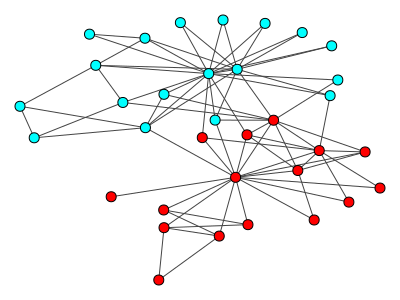

In [4]:
ly = g.layout_kamada_kawai()
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

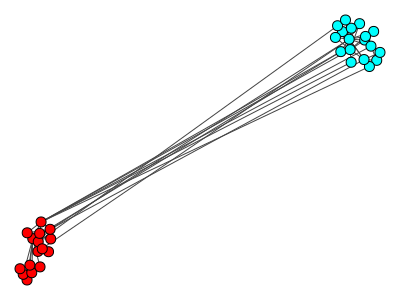

In [5]:
ly = embed2layout(FN+'.embedding.1')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

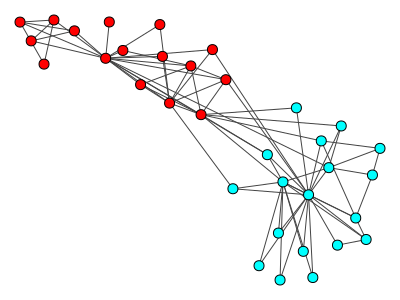

In [6]:
ly = embed2layout(FN+'.embedding.2')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

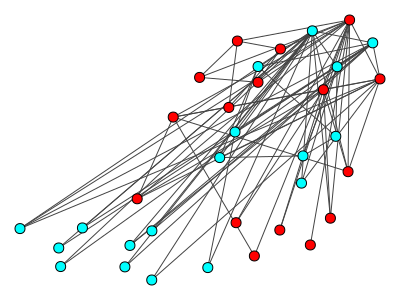

In [7]:
ly = embed2layout(FN+'.embedding.3')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

In [8]:
FN = "./Data/lfr15"
g = buildGraph(FN+'.edgelist',FN+'.community')

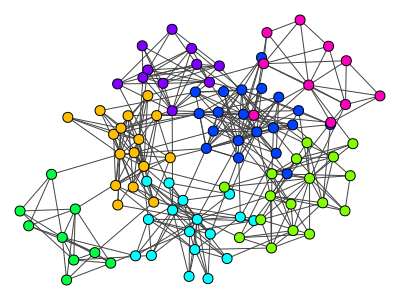

In [9]:
ly = g.layout_kamada_kawai()
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

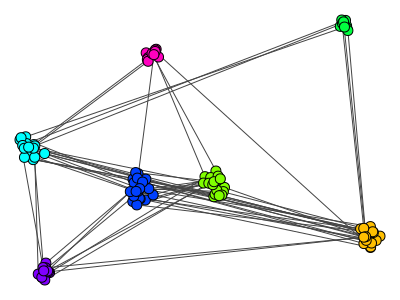

In [10]:
ly = embed2layout(FN+'.embedding.1')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

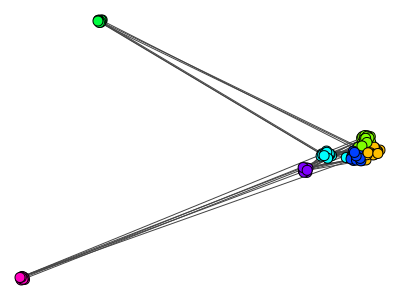

In [11]:
ly = embed2layout(FN+'.embedding.2')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

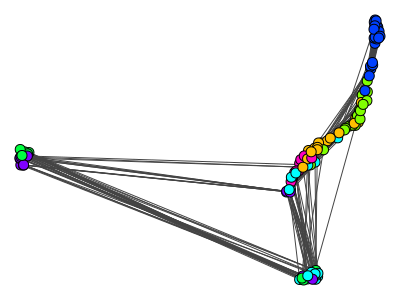

In [12]:
ly = embed2layout(FN+'.embedding.3')
ig.plot(g,layout=ly,bbox=(0,0,400,300), vertex_label_size=0, vertex_size=10 )

In [13]:
## running the C code to compare several embeddings
## ... make sure to compile GED.c first 
import subprocess
FN = "./Data/lfr15"
for i in range(3):
    x = './GED -g '+FN+'.edgelist'+' -c '+FN+'.ecg'+' -e '+FN+'.embedding.'+str(i+1)
    s = subprocess.run(x, shell=True, stdout=subprocess.PIPE)
    print(FN+'.embedding.'+str(i+1),':',s.stdout.decode()) 


./Data/lfr15.embedding.1 : Divergence: 3.881068e-04

./Data/lfr15.embedding.2 : Divergence: 7.880778e-03

./Data/lfr15.embedding.3 : Divergence: 1.273756e-02

